In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import pickle
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pylab as plt

In [4]:
df = pd.read_csv('customers .csv')

In [5]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [6]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [7]:
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [8]:
df.shape

(10695, 11)

In [9]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [10]:
df_cleaned=df.dropna(axis=0)

In [11]:
df_cleaned.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [12]:
df_cleaned.shape

(8819, 11)

In [13]:
df_cleaned.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [14]:
df_cleaned['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
df_cleaned['Ever_Married'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
df_cleaned['Graduated'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
df_cleaned['Family_Size'].unique()

array([4., 1., 2., 3., 5., 6., 8., 7., 9.])

In [18]:
df_cleaned['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],
      dtype=object)

In [19]:
df_cleaned['Spending_Score'].unique()

array(['Low', 'High', 'Average'], dtype=object)

In [20]:
df_cleaned['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
      dtype=object)

In [21]:
df_cleaned['Segmentation'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [22]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

categories_list=[['Male','Female'],
                 ['No','Yes'],
                 ['No','Yes'],
                 ['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
                 'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
                 ['Low','Average','High']
                 ]
enc = OrdinalEncoder(categories = categories_list)

cust_1=df_cleaned.copy()
cust_1[['Gender','Ever_Married','Graduated','Profession','Spending_Score']]=enc.fit_transform(cust_1[['Gender','Ever_Married','Graduated','Profession','Spending_Score']])

cust_1.dtypes

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [23]:
le = LabelEncoder()
     

cust_1['Segmentation'] = le.fit_transform(cust_1['Segmentation'])
     

cust_1.dtypes
     

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation         int32
dtype: object

In [24]:
cust_1 = cust_1.drop('ID',axis=1)
cust_1 = cust_1.drop('Var_1',axis=1)

In [25]:
cust_1.dtypes

Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation         int32
dtype: object

In [26]:
# Calculate the correlation matrix
corr = cust_1.corr()

<AxesSubplot:>

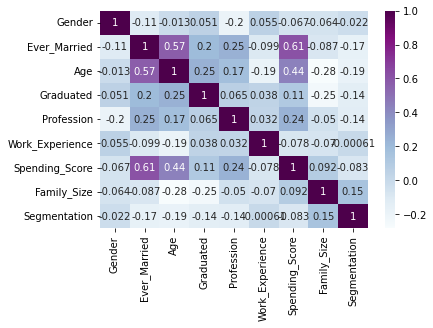

In [27]:
# Plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="BuPu",
        annot= True)

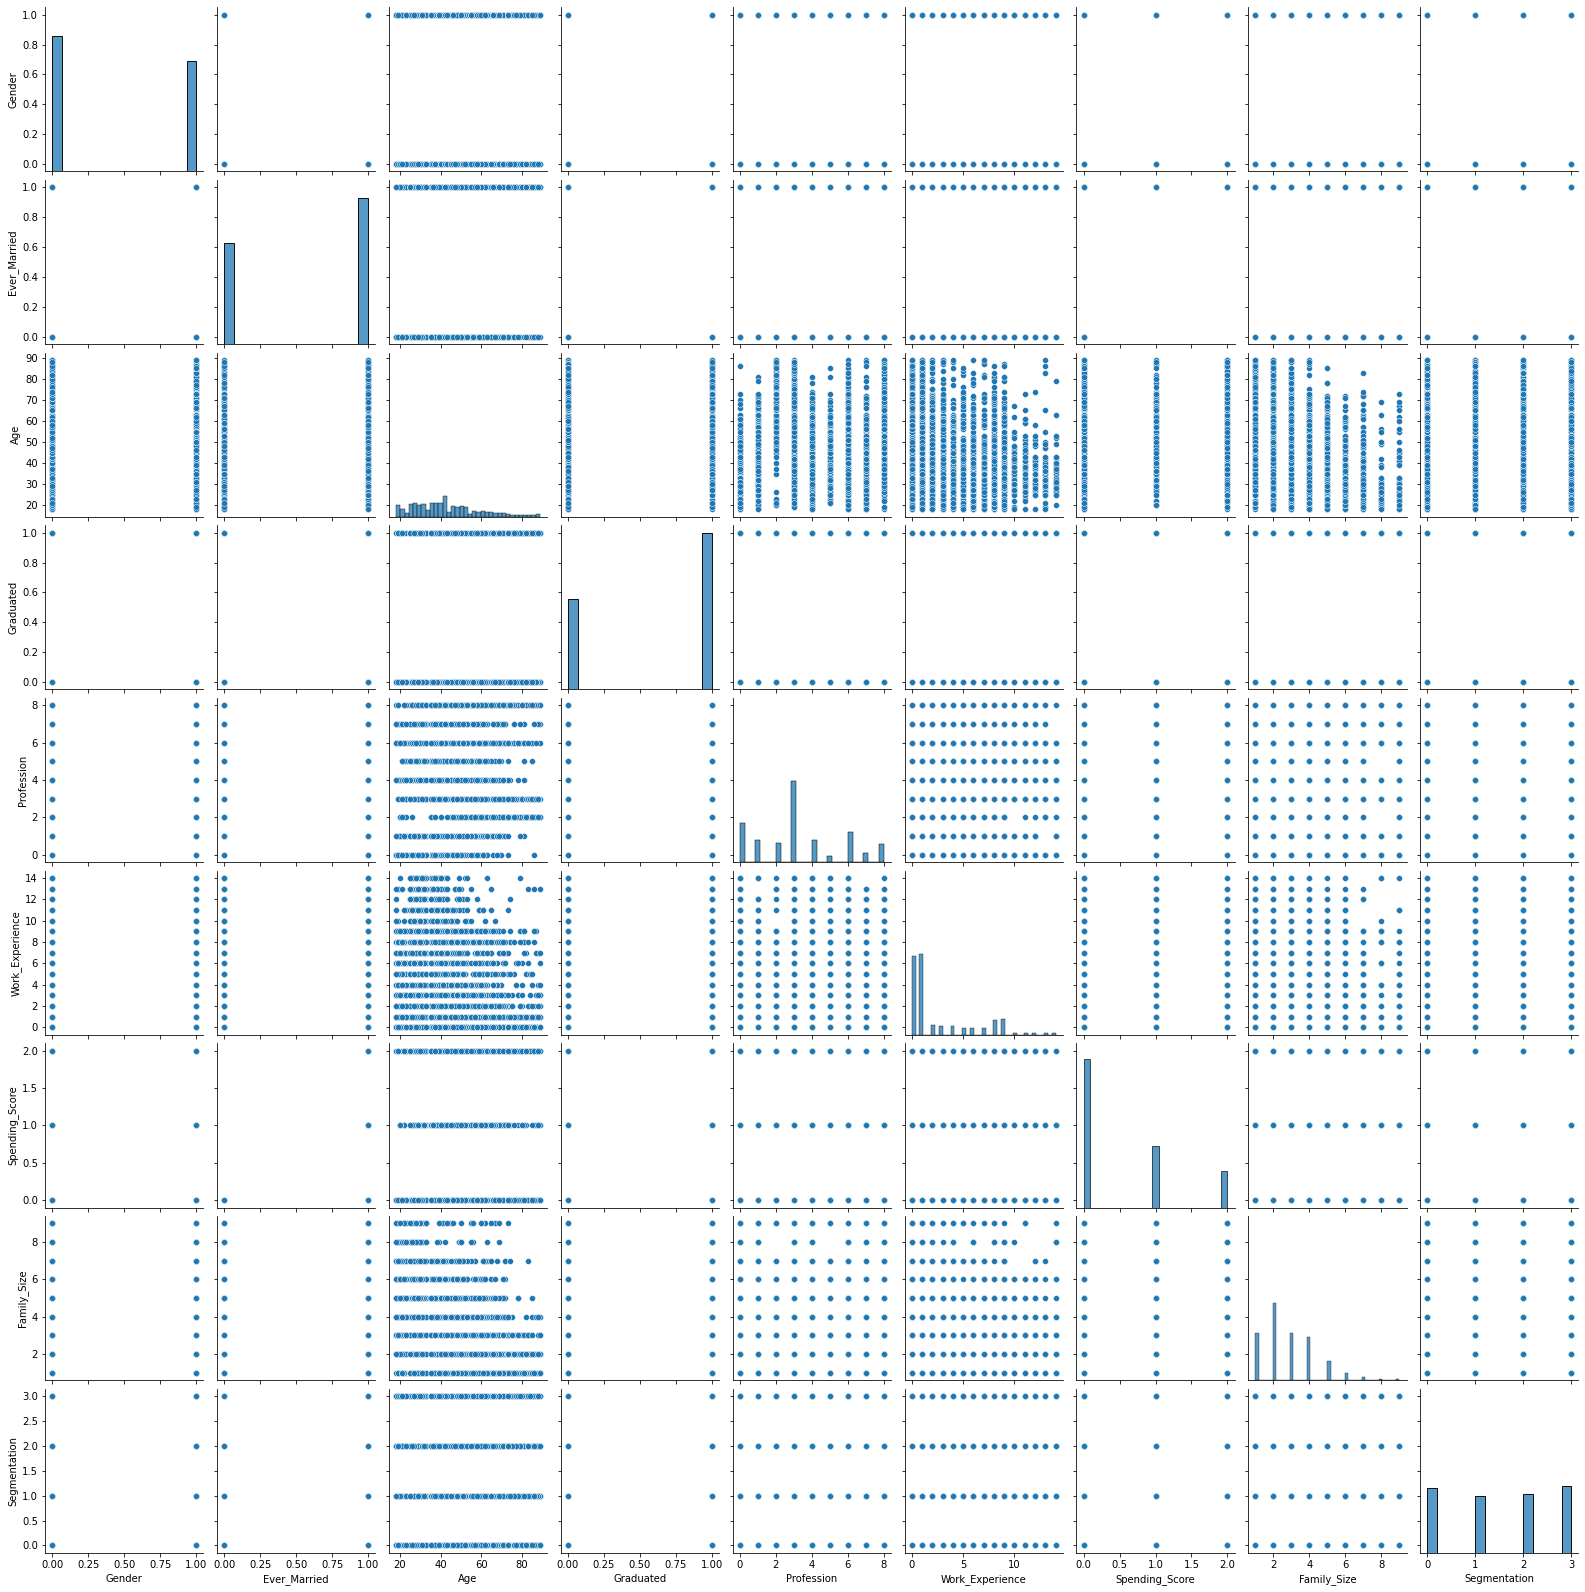

In [28]:
sns.pairplot(cust_1)

In [31]:
cust_1.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
count,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000
mean,0.448804,0.591450,43.517859,0.634312,3.287561,2.610160,0.544846,2.840118,1.518086
std,0.497400,0.491594,16.581537,0.481650,2.346652,3.390676,0.738487,1.535051,1.146645
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,31.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,1.000000,41.000000,1.000000,3.000000,1.000000,0.000000,2.000000,2.000000
75%,1.000000,1.000000,53.000000,1.000000,5.000000,4.000000,1.000000,4.000000,3.000000
max,1.000000,1.000000,89.000000,1.000000,8.000000,14.000000,2.000000,9.000000,3.000000


In [32]:
cust_1['Segmentation'].unique()

X=cust_1[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size']].values

In [33]:
y1 = cust_1[['Segmentation']].values
one_hot_enc = OneHotEncoder()
one_hot_enc.fit(y1)
y1.shape

(8819, 1)

In [34]:
y = one_hot_enc.transform(y1).toarray() 
y.shape    
y1[0]
y[0]

array([0., 0., 0., 1.])

In [35]:
X.shape

(8819, 8)

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.33,
                                               random_state=50)

In [37]:
X_train[0]
X_train.shape

(5908, 8)

In [38]:
scaler_age = MinMaxScaler()
scaler_age.fit(X_train[:,2].reshape(-1,1))
X_train_scaled = np.copy(X_train)
X_test_scaled = np.copy(X_test)

In [39]:
# To scale the Age column
X_train_scaled[:,2] = scaler_age.transform(X_train[:,2].reshape(-1,1)).reshape(-1)
X_test_scaled[:,2] = scaler_age.transform(X_test[:,2].reshape(-1,1)).reshape(-1)

In [40]:
# Creating the model
ai_brain = Sequential([
  Dense(8,input_shape=(8,)),
  Dense(16,activation='relu'),
  Dense(16,activation='relu'),
  Dense(4,activation='softmax'),
])

In [41]:
ai_brain.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [42]:
ai_brain.fit(x=X_train_scaled,y=y_train,
             epochs=2000,batch_size=256,
             validation_data=(X_test_scaled,y_test),
             )

Epoch 1/2000
24/24 [==============================] - 2s 15ms/step - loss: 1.4307 - accuracy: 0.2773 - val_loss: 1.3799 - val_accuracy: 0.2769
Epoch 2/2000
24/24 [==============================] - 0s 3ms/step - loss: 1.3609 - accuracy: 0.3172 - val_loss: 1.3594 - val_accuracy: 0.3274
Epoch 3/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.3426 - accuracy: 0.3605 - val_loss: 1.3456 - val_accuracy: 0.3476
Epoch 4/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.3277 - accuracy: 0.3780 - val_loss: 1.3325 - val_accuracy: 0.3555
Epoch 5/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.3124 - accuracy: 0.3857 - val_loss: 1.3181 - val_accuracy: 0.3720
Epoch 6/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.2988 - accuracy: 0.3927 - val_loss: 1.3059 - val_accuracy: 0.3793
Epoch 7/2000
24/24 [==============================] - 0s 3ms/step - loss: 1.2880 - accuracy: 0.3951 - val_loss: 1.2967 - val_accuracy: 0.3847
Epoch

In [44]:
metrics = pd.DataFrame(ai_brain.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.430673,0.277251,1.379868,0.276881
1,1.360936,0.317197,1.359407,0.327379
2,1.342569,0.360528,1.345599,0.347647
3,1.327721,0.377962,1.332465,0.355548
4,1.312392,0.385748,1.318149,0.372037


<AxesSubplot:>

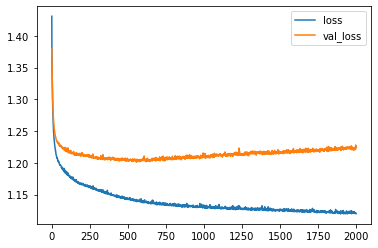

In [45]:
metrics[['loss','val_loss']].plot()

In [50]:
x_test_predictions = np.argmax(ai_brain.predict(X_test_scaled), axis=1)
x_test_predictions.shape
y_test_truevalue = np.argmax(y_test,axis=1)

In [51]:
y_test_truevalue.shape

(2911,)

In [52]:
print(confusion_matrix(y_test_truevalue,x_test_predictions))

[[347 134 112 164]
 [220 153 213 100]
 [133 129 343  81]
 [211  64  47 460]]


In [53]:
print(classification_report(y_test_truevalue,x_test_predictions))

              precision    recall  f1-score   support

           0       0.38      0.46      0.42       757
           1       0.32      0.22      0.26       686
           2       0.48      0.50      0.49       686
           3       0.57      0.59      0.58       782

    accuracy                           0.45      2911
   macro avg       0.44      0.44      0.44      2911
weighted avg       0.44      0.45      0.44      2911



In [55]:
# Saving the Model
ai_brain.save('customer_classification_model.h5')

In [56]:
# Saving the data
with open('customer_data.pickle', 'wb') as fh:
   pickle.dump([X_train_scaled,y_train,X_test_scaled,y_test,cust_1,df_cleaned,scaler_age,enc,one_hot_enc,le], fh)

ai_brain = load_model('customer_classification_model.h5')

In [57]:
# Loading the data
with open('customer_data.pickle', 'rb') as fh:
   [X_train_scaled,y_train,X_test_scaled,y_test,customers_1,customer_df_cleaned,scaler_age,enc,one_hot_enc,le]=pickle.load(fh)

In [59]:
     
#Prediction for a single input
x_single_prediction = np.argmax(ai_brain.predict(X_test_scaled[1:2,:]), axis=1)
print(x_single_prediction)

[2]


In [60]:
print(le.inverse_transform(x_single_prediction))

['C']
